In [2]:
import statistics
import pickle
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

from f1predict.quali.baselineModels import F1ResultsGetter, F1RandomModel, F1PreviousModel

In [6]:
#Year, Season
seasonsData = None
#RaceId, List of tuples of (driverId, constructorId, time)
qualiResultsData = None

with open('../data/seasonsData.pickle', 'rb') as handle:
    seasonsData = pickle.load(handle)
    
with open('../data/qualiResultsData.pickle', 'rb') as handle:
    qualiResultsData = pickle.load(handle)
    
resultsGetter = F1ResultsGetter(seasonsData, qualiResultsData)
randomModel = F1RandomModel(seasonsData, qualiResultsData)
previousModel = F1PreviousModel(seasonsData, qualiResultsData)
with open('../out/trained_quali_processor.pickle', 'rb') as handle:
    linearModel = pickle.load(handle)

In [10]:
randomPredictions = randomModel.constructPredictions()
previousPredictions = previousModel.constructPredictions()
linearModelPredictions = linearModel.getPredictions()
results = resultsGetter.constructQualiResults()

In [11]:
randomModelErrors = []
previousModelErrors = []
linearModelErrors = []
for i, res in enumerate(results):
    raceRandomErrs = []
    racePreviousErrs = []
    raceLinearErrs = []
    for pos, driver_id in enumerate(results[i]):
        randomModel_pos = randomPredictions[i].index(driver_id)
        raceRandomErrs.append(abs(pos - randomModel_pos))

        previousModel_pos = previousPredictions[i].index(driver_id)
        racePreviousErrs.append(abs(pos - previousModel_pos))

        linearModel_pos = linearModelPredictions[i].index(driver_id)
        raceLinearErrs.append(abs(pos - linearModel_pos))
    randomModelErrors.append(sum(raceRandomErrs))
    previousModelErrors.append(sum(racePreviousErrs))
    linearModelErrors.append(sum(raceLinearErrs))
        
print('Random model MAE: {}'.format(statistics.mean(randomModelErrors)))
print('Previous Qualifying model MAE: {}'.format(statistics.mean(previousModelErrors)))
print('Linear Qualifying model (F1Predict model) MAE: {}'.format(statistics.mean(linearModelErrors)))

print('Random model MedianAE: {}'.format(statistics.median(randomModelErrors)))
print('Previous Qualifying model MedianAE: {}'.format(statistics.median(previousModelErrors)))
print('Linear Qualifying model (F1Predict model) MedianAE: {}'.format(statistics.median(linearModelErrors)))

Random model MAE: 135.13595166163142
Previous Qualifying model MAE: 67.15407854984895
Linear Qualifying model (F1Predict model) MAE: 52.368580060422964
Random model MedianAE: 130
Previous Qualifying model MedianAE: 62
Linear Qualifying model (F1Predict model) MedianAE: 48


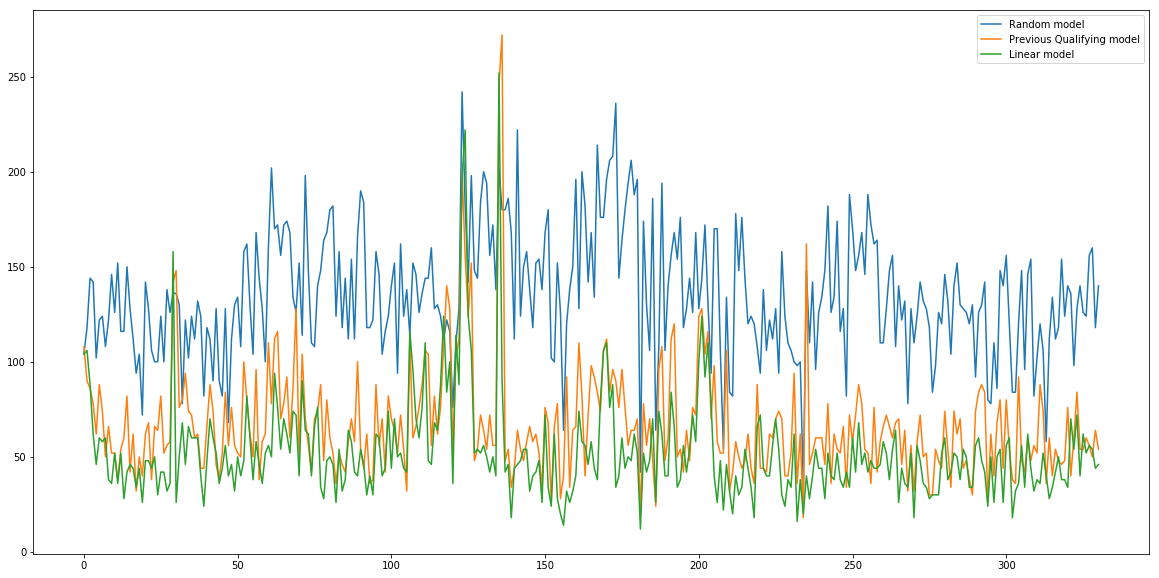

In [12]:
plt.figure(figsize=(20,10))

plt.plot(randomModelErrors)
plt.plot(previousModelErrors)
plt.plot(linearModelErrors)
plt.legend(["Random model", "Previous Qualifying model", "Linear model"])
plt.show()